# Анализ заболеваний сердечно-сосудистой системы

In [78]:
import pandas as pd
import numpy as np

**Информация о датасете "heart":**

1. age
2. sex (0 - female, 1 - male)
3. chest pain type (0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic)
4. resting blood pressure (0: Normal, 1: ST-T Wave Abnormality, 2: Left Ventricular Hypertrophy)
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl  (0: Less Than 120mg/ml, 1: Greater Than 120mg/ml)
7. resting electrocardiographic results (0: Normal, 1: ST-T Wave Abnormality, 2: Left Ventricular Hypertrophy)
8. maximum heart rate achieved
9. exercise induced angina (0 - no, 1 - yes)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)
12. number of major vessels (0-3) colored by flouroscopy
13. thal (0: normal, 1: fixed defect, 2: reversable defect, 3: irreversible defect)
14. target refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Задание: проанализировать от чего зависит target.

In [79]:
df = pd.read_csv('heart.csv')

In [80]:
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [81]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [82]:
df.isna().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Пропуски отсутствуют. Все данные числовые.

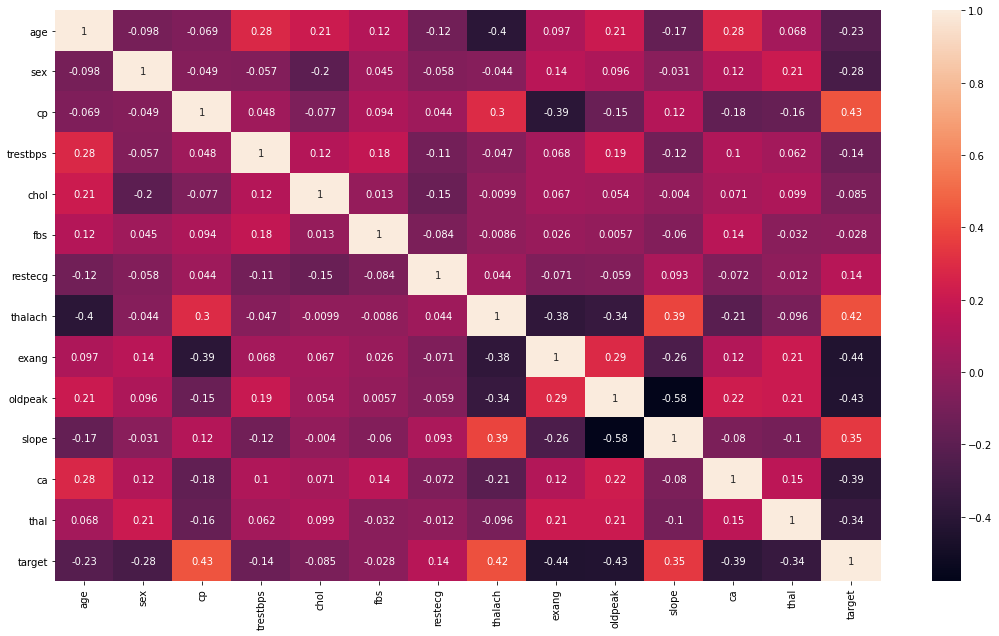

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = df.corr()
fig = sns.heatmap(cm, annot=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Сильнее всего с target связаны: 


*   cp (*характер боли в груди*), thalach (*ЧСС*), slope (*депрессия ST, вызванная физической нагрузкой*)
*   exang (*стенокардия, вызванная физической нагрузкой*), oldpeak (*наклон сегмента ST при пиковой нагрузке*), ca (*количество крупных сосудов, задектированных при рентгеноскопии*), thal (*степень тяжести талассемии*)

Также можно сделать вывод о сильной связи slope с oldpeak.


In [84]:
df['age_group'] = pd.qcut(df['age'],7)

In [85]:
df.groupby('age_group')['target'].agg(['count','mean'])

count      mean
age_group                      
(28.999, 43.0]     45  0.755556
(43.0, 49.0]       43  0.651163
(49.0, 54.0]       56  0.678571
(54.0, 57.0]       36  0.416667
(57.0, 60.0]       44  0.340909
(60.0, 64.0]       38  0.368421
(64.0, 77.0]       41  0.512195

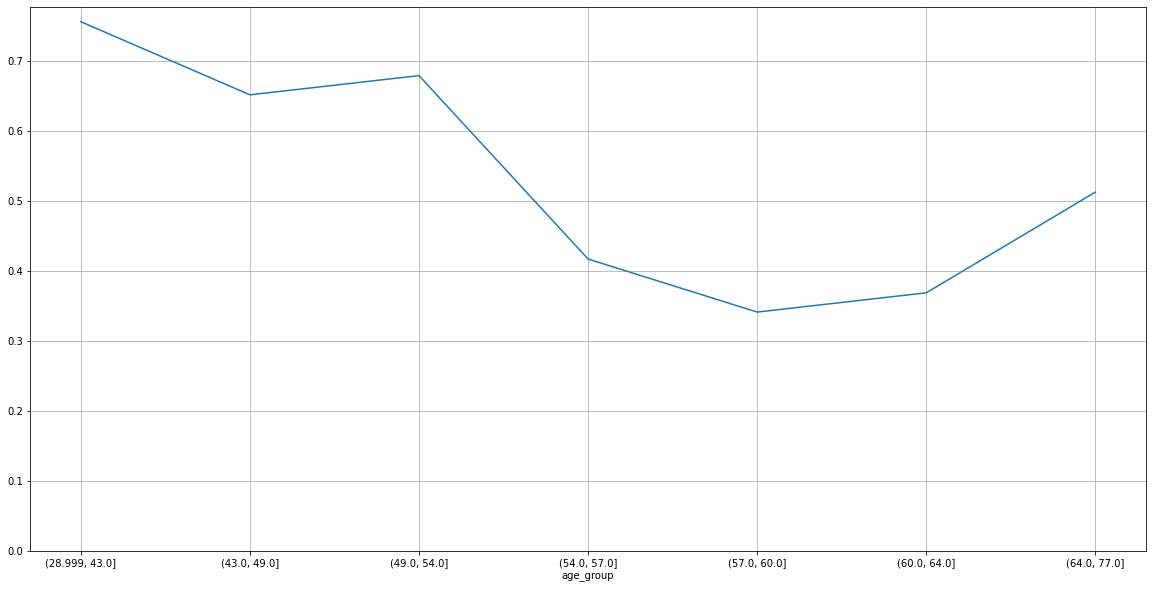

In [86]:
df.groupby('age_group')['target'].mean().plot(ylim=0,grid=True, figsize=(20, 10))

Чаще всего заболевания сердечно-сосудистой системы встречаются у молодых пациентов. В возрасте 57-60 лет этот показатель самый низкий.

In [87]:
df.groupby(['age_group','sex'])['target'].agg(['count','mean'])

count      mean
age_group      sex                 
(28.999, 43.0] 0       13  0.923077
               1       32  0.687500
(43.0, 49.0]   0       11  1.000000
               1       32  0.531250
(49.0, 54.0]   0       16  0.937500
               1       40  0.575000
(54.0, 57.0]   0       11  0.454545
               1       25  0.400000
(57.0, 60.0]   0       11  0.636364
               1       33  0.242424
(60.0, 64.0]   0       17  0.411765
               1       21  0.333333
(64.0, 77.0]   0       17  0.882353
               1       24  0.250000

В выборке из женщин от 43 до 49 лет все имеют заболевания сердечно-сосудистой системы. Также чаще всего болеют самые молодые женщины (до 43 лет) и женщины от 49 до 54 лет. 

In [88]:
df.groupby('sex')['target'].agg(['count','mean'])

count      mean
sex                 
0       96  0.750000
1      207  0.449275

Пол играет важную роль для target (сильнее связан с женским полом), однако неравнозначность выборок не позволяет судить однозначно.

In [89]:
df.groupby('cp')['target'].agg(['count','mean'])

count      mean
cp                 
0     143  0.272727
1      50  0.820000
2      87  0.793103
3      23  0.695652

Характер боли в грудной клетке под номером 1 (типичная стенокардия) сильнее всего влияет на target.

In [90]:
df.groupby(['sex', 'cp'])['target'].agg(['count','mean'])

count      mean
sex cp                 
0   0      39  0.461538
    1      18  0.888889
    2      35  0.971429
    3       4  1.000000
1   0     104  0.201923
    1      32  0.781250
    2      52  0.673077
    3      19  0.631579

Характер боли в грудной клетке под номером 1 оказался важным для target в случае мужской и женской выборок (для женщин номер 2 оказался более значимым, но этот феномен может быть объяснен неравнозначным объемом выборок).

In [91]:
df['trestbps2'] = pd.qcut(df['trestbps'],7)

In [92]:
df.groupby('trestbps2')['target'].agg(['count','mean','median'])

count      mean  median
trestbps2                               
(93.999, 112.0]     48  0.604167       1
(112.0, 120.0]      49  0.632653       1
(120.0, 128.0]      37  0.432432       0
(128.0, 132.0]      45  0.600000       1
(132.0, 140.0]      59  0.593220       1
(140.0, 150.0]      31  0.451613       0
(150.0, 200.0]      34  0.382353       0

Артериальное давление 112-120 мм рт.ст. сильнее всего связано с риском развития заболеваний ССС.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


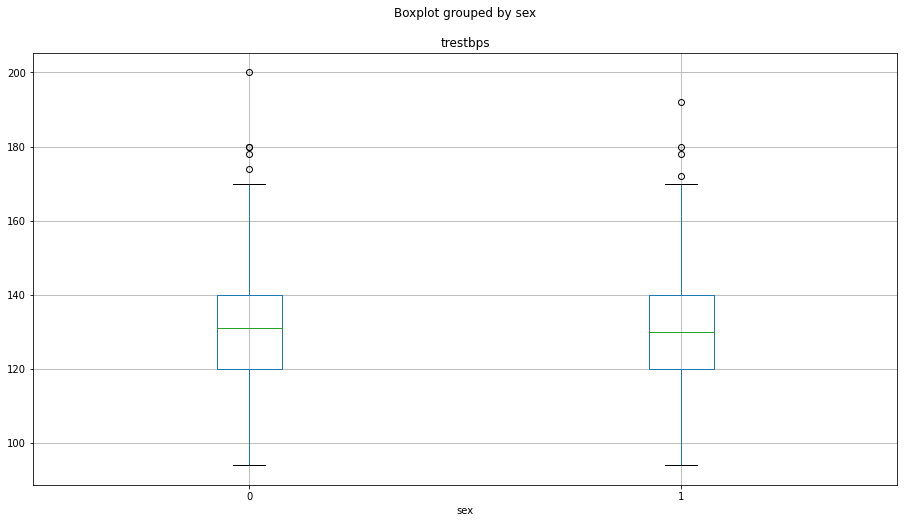

In [93]:
df.boxplot('trestbps',by='sex', figsize=(15, 8))

У женщин этот показатель в среднем выше.

In [94]:
df.groupby(['age_group','sex'])['trestbps'].agg(['count','mean','median'])

count        mean  median
age_group      sex                           
(28.999, 43.0] 0       13  119.769231   120.0
               1       32  127.187500   128.0
(43.0, 49.0]   0       11  125.909091   130.0
               1       32  122.437500   120.0
(49.0, 54.0]   0       16  127.937500   130.0
               1       40  129.650000   128.0
(54.0, 57.0]   0       11  142.454545   134.0
               1       25  134.560000   130.0
(57.0, 60.0]   0       11  136.545455   136.0
               1       33  135.363636   134.0
(60.0, 64.0]   0       17  139.058824   140.0
               1       21  133.857143   130.0
(64.0, 77.0]   0       17  138.470588   140.0
               1       24  137.083333   136.5

Группой риска, согласно раннее сделанному выводу о критичном АД = 112-120 мм рт.ст., являются женщины в возрасте 28.9-43 года. 

In [95]:
df['thalach_group'] = pd.qcut(df['thalach'],7)

In [96]:
df.groupby('thalach_group')['target'].agg(['count','mean'])

count      mean
thalach_group                     
(70.999, 123.143]     44  0.272727
(123.143, 140.0]      47  0.297872
(140.0, 148.429]      39  0.384615
(148.429, 157.0]      44  0.636364
(157.0, 163.0]        44  0.659091
(163.0, 173.0]        46  0.739130
(173.0, 202.0]        39  0.846154

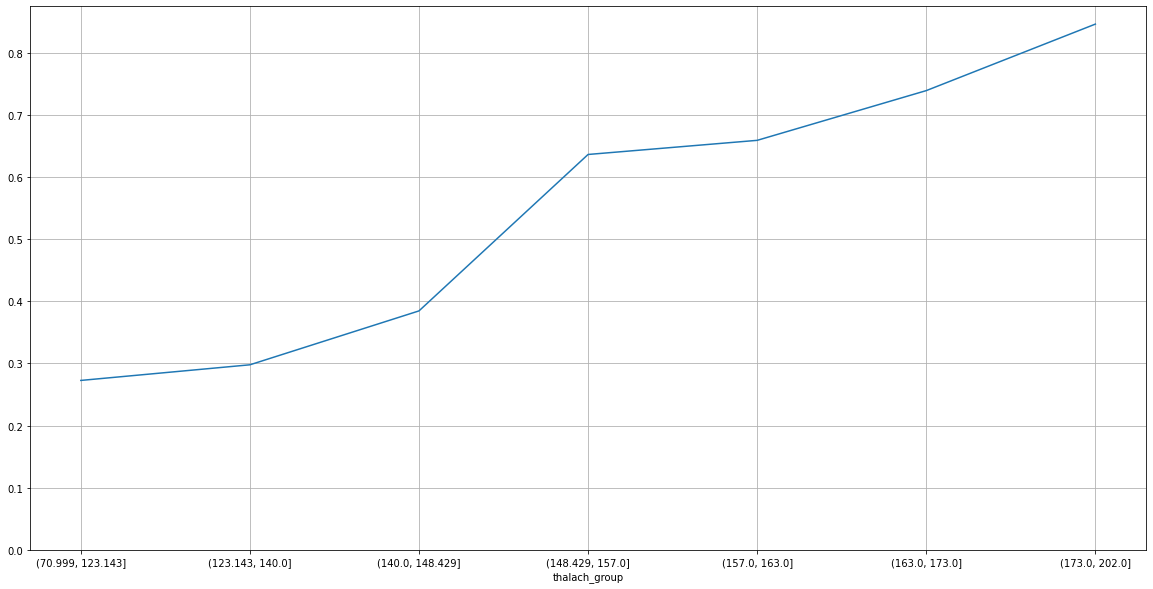

In [97]:
df.groupby('thalach_group')['target'].mean().plot(ylim=0,grid=True, figsize=(20, 10))

Очевидно, что чем выше ЧСС, тем выше риск заболеваний ССС.

In [98]:
df.groupby('thalach_group')['target'].agg(['count','mean'])

count      mean
thalach_group                     
(70.999, 123.143]     44  0.272727
(123.143, 140.0]      47  0.297872
(140.0, 148.429]      39  0.384615
(148.429, 157.0]      44  0.636364
(157.0, 163.0]        44  0.659091
(163.0, 173.0]        46  0.739130
(173.0, 202.0]        39  0.846154

Наибольшее влияние на target оказывает ЧСС = 173-202 ударов в минуту.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


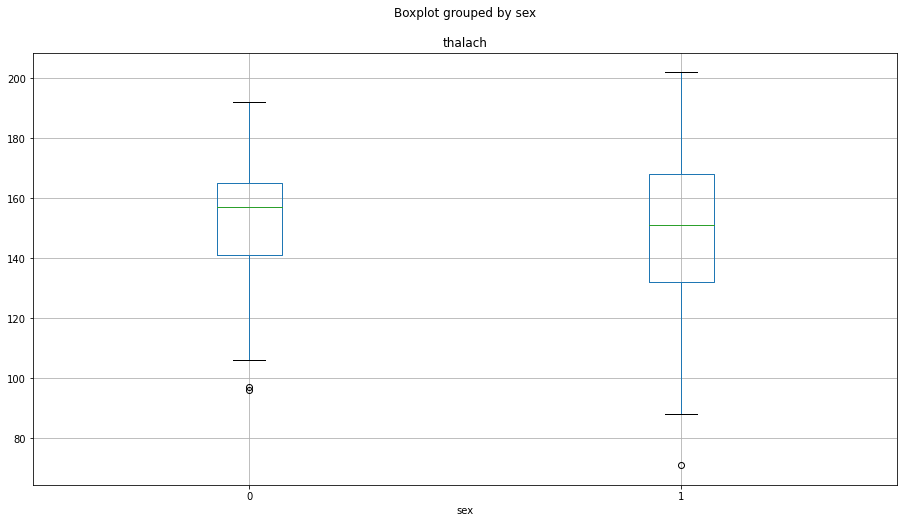

In [99]:
df.boxplot('thalach',by='sex', figsize=(15, 8))

Среднее значение ЧСС по женской выборе превосходит значение по мужской, однако в мужской выборке больше размах. Связь ЧСС с полом не имеет веса (корреляция -0.044).

In [100]:
df.groupby(['age_group','sex'])['thalach'].agg(['count','mean','median'])

count        mean  median
age_group      sex                           
(28.999, 43.0] 0       13  165.076923   170.0
               1       32  163.843750   172.0
(43.0, 49.0]   0       11  157.909091   160.0
               1       32  159.093750   161.0
(49.0, 54.0]   0       16  154.562500   158.5
               1       40  150.250000   156.0
(54.0, 57.0]   0       11  148.090909   153.0
               1       25  141.400000   144.0
(57.0, 60.0]   0       11  146.545455   152.0
               1       33  147.636364   154.0
(60.0, 64.0]   0       17  148.000000   154.0
               1       21  134.666667   140.0
(64.0, 77.0]   0       17  140.882353   148.0
               1       24  135.666667   139.0

Самая высокая ЧСС присуща молодым пациентам обоих полов.

In [101]:
df.groupby('slope')['target'].agg(['count','mean','median'])

count      mean  median
slope                         
0         21  0.428571       0
1        140  0.350000       0
2        142  0.753521       1

Для target важна депрессия сегмента ST (под номером 2). Это логично, так как депрессия сегмента ST отражает ишемические изменения в миокарде.

In [102]:
df.groupby(['age_group','slope'])['target'].agg(['count','mean'])

count      mean
age_group      slope                 
(28.999, 43.0] 0          2  1.000000
               1         15  0.466667
               2         28  0.892857
(43.0, 49.0]   0          3  0.333333
               1         16  0.562500
               2         24  0.750000
(49.0, 54.0]   0          3  0.666667
               1         21  0.428571
               2         32  0.843750
(54.0, 57.0]   0          4  0.250000
               1         21  0.238095
               2         11  0.818182
(57.0, 60.0]   0          3  0.333333
               1         22  0.227273
               2         19  0.473684
(60.0, 64.0]   0          4  0.250000
               1         22  0.318182
               2         12  0.500000
(64.0, 77.0]   0          2  0.500000
               1         23  0.304348
               2         16  0.812500

Пациенты от 28.9 до 43 лет с депрессией сегмента ST чаще всего имеют заболевания ССС. Корреляция с полом ничтожно мала (-0.031, как мы выяснили ранее).

In [103]:
df.groupby('exang')['target'].agg(['count','mean','median'])

count      mean  median
exang                         
0        204  0.696078       1
1         99  0.232323       0

Нельзя однозначно судить о связи с target из-за разного объема выборок. Однако, отсутствие стенокардии при физической нагрузке важнее для target. Также связь со стенокардией, вызванной физической нагрузкой, имеют ЧСС и характер боли в грудной клетке.

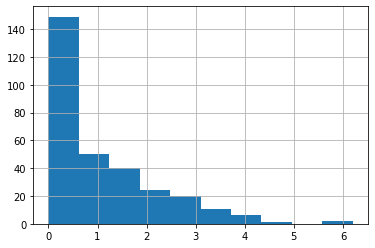

In [104]:
df['oldpeak'].hist()

Чаще всего встречается oldpeak в диапазоне 0-1. 

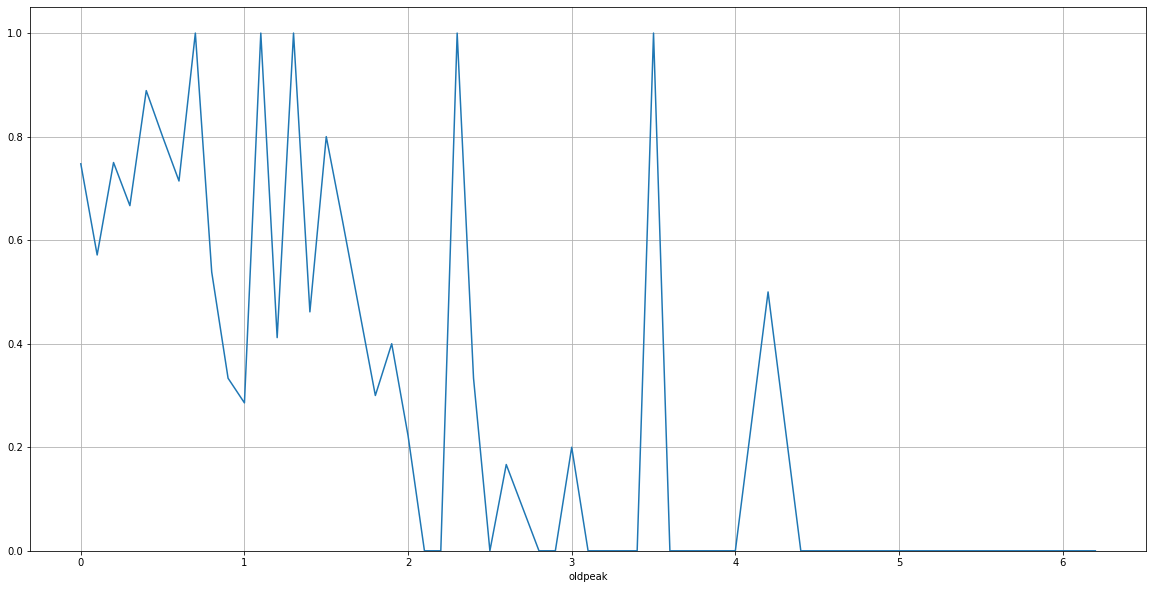

In [105]:
df.groupby('oldpeak')['target'].mean().plot(ylim=0,grid=True, figsize=(20, 10))

Очевидно, что большую связь с target имеют значения oldpeak с 0 до 1.5.

In [106]:
df.groupby('ca')['target'].agg(['count','mean','median'])

count      mean  median
ca                         
0     175  0.742857       1
1      65  0.323077       0
2      38  0.184211       0
3      20  0.150000       0
4       5  0.800000       1

Чем меньше крупных сосудов визуализируются на рентгеноскопии, тем выше вероятность наличия заболеваний ССС.

In [107]:
df.groupby('thal')['target'].agg(['count','mean','median'])

count      mean  median
thal                         
0         2  0.500000     0.5
1        18  0.333333     0.0
2       166  0.783133     1.0
3       117  0.239316     0.0

Наличие талассемии повышает риск заболеваний ССС.

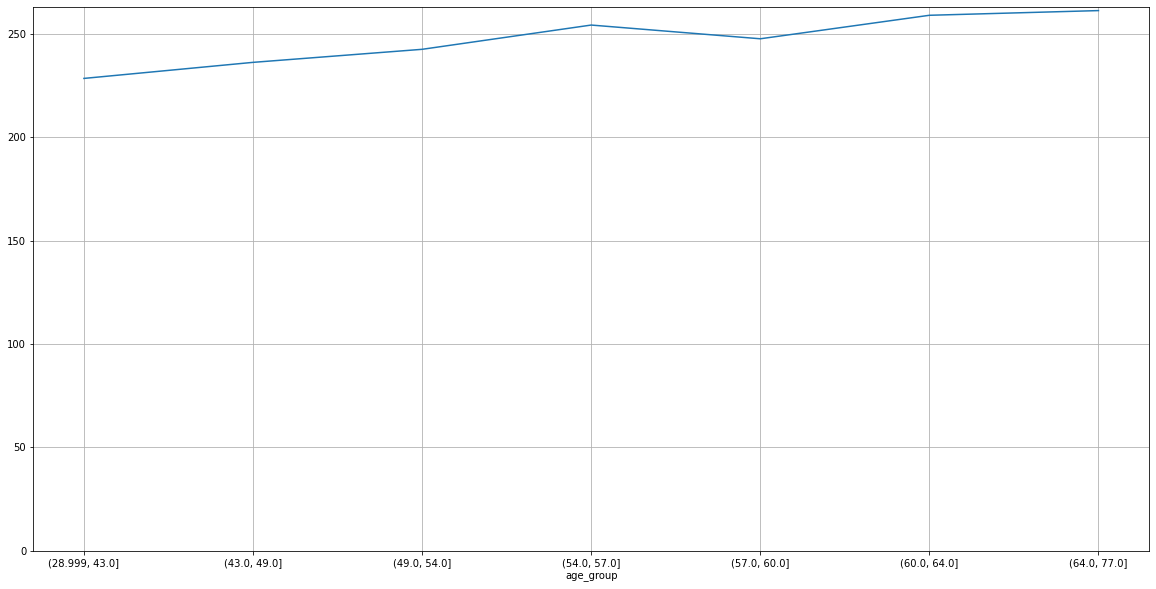

In [108]:
df.groupby('age_group')['chol'].mean().plot(ylim=0,grid=True, figsize=(20, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


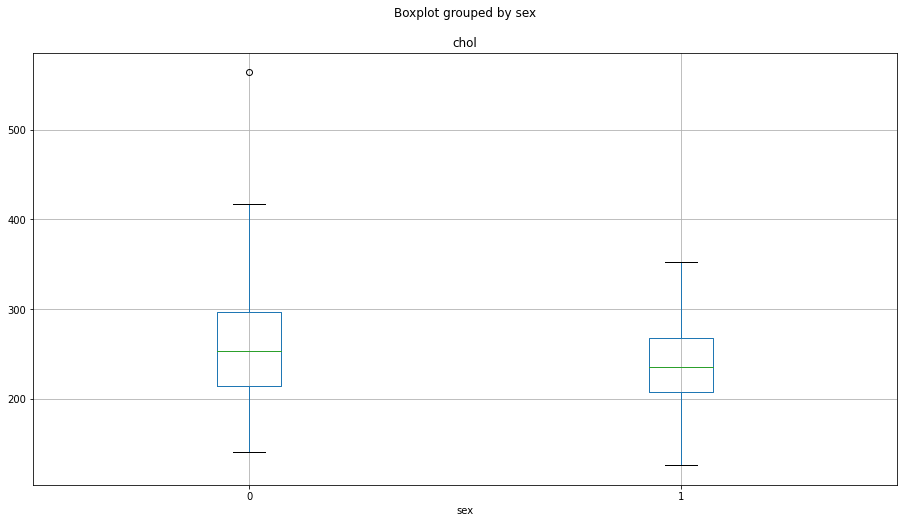

In [109]:
df.boxplot('chol',by='sex', figsize=(15, 8))

Концентрация холестерина в крови увеличивается с возрастом и выше у женщин.

In [110]:
df['chol_group'] = pd.qcut(df['chol'],7)

In [111]:
df.groupby(['sex','chol_group'])['target'].agg(['count','mean'])

count      mean
sex chol_group                       
0   (125.999, 197.0]     12  0.833333
    (197.0, 214.286]     12  0.916667
    (214.286, 233.0]      9  0.666667
    (233.0, 249.0]       13  0.692308
    (249.0, 269.0]       16  0.750000
    (269.0, 299.857]     10  0.800000
    (299.857, 564.0]     24  0.666667
1   (125.999, 197.0]     33  0.484848
    (197.0, 214.286]     30  0.566667
    (214.286, 233.0]     36  0.527778
    (233.0, 249.0]       29  0.551724
    (249.0, 269.0]       28  0.428571
    (269.0, 299.857]     31  0.193548
    (299.857, 564.0]     20  0.350000

Для женщин важную связь с target имеет уровень холестерина, равный 197-214.286 мг/дл. Именно этот уровень зарегистрирован у самых молодых пациенток. Для мужчин связь не столь очевидна.

## **Вывод.**

Самая уязвимая группа – это женщины от 28.9 до 43 лет, с ЧСС 173-202 ударов в минуту, с АД 112-120 мм рт.ст. (но между собой ЧСС и АД не связаны ни прямо, ни обратно пропорционально), с уровнем холестерина, равным 197-214.286 мг/дл. Также заболеваниям подвержены пациенты обоих полов с депрессией сегмента ST в ЭКГ, с типичной стенокардической болью в грудной клетке, страдающие талассемией, у которых не визуализируются крупные сосуды на рентгеноскопии, а наклон сегмента ST при пиковой нагрузке входит в диапазон 0-1.5.
Есть гипотеза, что выборка молодых пациенток была составлена из женщин, имеющих врожденные пороки сердца, поэтому именно эта группа является группой повышенного риска для заболеваний ССС.